In [1]:
# from utility_functions import hw2q1 as generate_data
import hw2q2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#w_map = np.dot(np.linalg.inv(np.sum(Z,axis=2)+(0.01/pow(gamma,2)*np.identity(4))),   np.sum((repmat(y.T,4,1) * z),axis=1)).reshape((4,1))

def mle(phi, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.matmul(tphi,phi)),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

def mean_squared_error(w, x_test, y_test):
    N = len(y_test)
    x = []
    for i in range(0,N,1):
        row = [1, x_test[i][0], x_test[i][1], x_test[i][0]**2, 
                x_test[i][1]**2, x_test[i][0]**3, x_test[i][1]**3]
        x.append(row)
    total_error = 0
    for n in range(0,N,1):
        error = (y_test[n]-np.dot((w),x[n]))**2
        total_error = total_error + error
    total_error = total_error/N
    return total_error[0,0]

def map(phi, gamma, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.add(gamma*np.identity(phi.shape[1]), np.matmul(tphi,phi))),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

In [3]:
def mlParamEstimate(Xc,yc):
    # (xT * X)^-1 * xT * y
    return (np.linalg.inv(Xc.T.dot(Xc)).dot(Xc.T)).dot(yc)

def mapParamEstimate(Xc,yc,gamma):
    # (xT * X + gamma * I)^-1 * xT * y
    return (np.linalg.inv(Xc.T.dot(Xc) + gamma*np.identity(Xc.shape[1])).dot(Xc.T)).dot(yc)

def meanSquaredError(w, x, y):
    N = len(y)
    x_tilde = np.array([np.ones(x.shape[0]),x[:,0], x[:,1],x[:,0]**2,x[:,1]**2,x[:,0]**3, x[:,1]**3]).T
    error = (y-x_tilde.dot(w))**2
    mse = np.sum(error)/N
    return mse

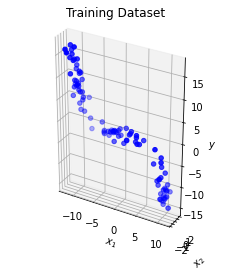

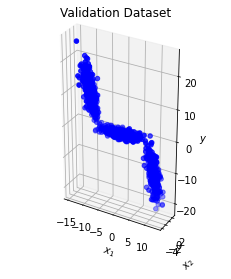

5.699399092509981
5.636634872881076
[0.0001, 0.00026366508987303583, 0.0006951927961775605, 0.0018329807108324356, 0.004832930238571752, 0.012742749857031334, 0.03359818286283781, 0.08858667904100823, 0.23357214690901212, 0.615848211066026, 1.623776739188721, 4.281332398719396, 11.288378916846883, 29.763514416313132, 78.47599703514607, 206.913808111479, 545.5594781168514, 1438.44988828766, 3792.690190732246, 10000.0]
[5.69939245 5.69938158 5.69935293 5.69927739 5.69907825 5.69855353
 5.69717235 5.69354662 5.68409646 5.6599156  5.60084015 5.47126465
 5.24175509 4.94464472 4.6542793  4.40960883 4.24908485 4.19244089
 4.18895339 4.19379418]


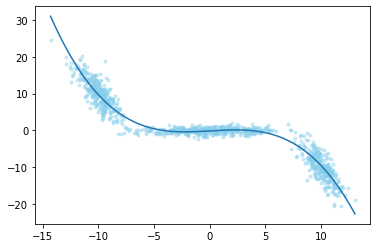

In [22]:

# train = 100 samples, test = 1000 samples
x_train, y_train, x_test, y_test = hw2q2.hw2q2()

# -------------------------------------------------
# MLE
# -------------------------------------------------
#x_tilde = np.array([x_train[:,0]**3, x_train[:,1]**3,x_train[:,0]**2,x_train[:,1]**2,x_train[:,0], x_train[:,1],np.ones(x_train.shape[0])]).T
x_tilde = np.array([np.ones(x_train.shape[0]),x_train[:,0], x_train[:,1],x_train[:,0]**2,x_train[:,1]**2,x_train[:,0]**3, x_train[:,1]**3]).T
w_mle = mlParamEstimate(x_tilde,y_train) # Get MAximum Likelihood Parameter Estimate
mse_mle = meanSquaredError(w_mle, x_test, y_test) # Get mean squared error
print(mse_mle)

# -------------------------------------------------
# MAP
# -------------------------------------------------
gamma = 1
w_map = mapParamEstimate(x_tilde,y_train,gamma) #Get Maximum a Posteriori Parameter Estimate
mse_map = meanSquaredError(w_map, x_test, y_test) # Get mean squared error
print(mse_map)

gammas = [i for i in np.geomspace(10**-4,10**4,20)]
print(gammas)
w_maps = np.array([mapParamEstimate(x_tilde,y_train,gamma) for gamma in gammas])
mse_map = np.array([meanSquaredError(w_map, x_test, y_test) for w_map in w_maps])
print(mse_map)

    


# --------------------------------
# PLOT
# Add lines to plots
fig, axes = plt.subplots()
axes.scatter(x_test[:,0], y_test, color='skyblue', marker='.', alpha=0.4)
min_x_0 = min(x_test[:,0])
max_x_0 = max(x_test[:,0])
min_x_1 = min(x_test[1])
max_x_1 = max(x_test[1])
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)
w = np.transpose(w_mle)
fx = []
for i in range(len(x_0)):
    x = x_0[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
fx = np.squeeze(fx)
axes.plot(x_0,fx)

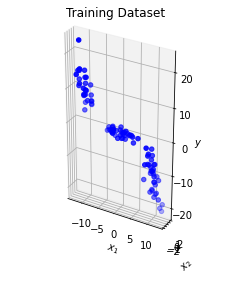

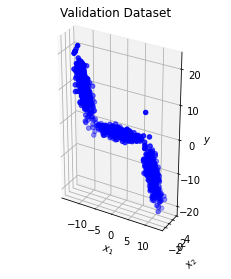

4.121207814887809
0.0001
4.121207008223413
0.001
4.121199748708705
0.01
4.121127199639248
0.1
4.120406288843195
1.0
4.113628866815641
10.0
4.072493037919727
100.0
4.01707435749603
1000.0
4.01505254585318
10000.0
4.026584994713884


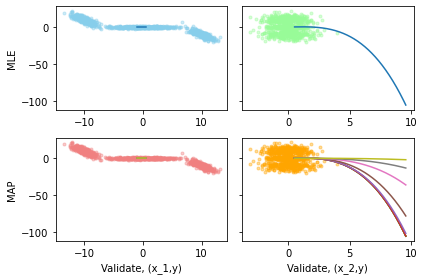

In [14]:
# train has 100 samples, validate has 1000 samples
x_train, y_train, x_test, y_test = hw2q2.hw2q2()
N = 100
phi = []
fig, axes = plt.subplots(2,2, sharex=False, sharey=True)
for i in range(x_train.shape[0]):
    row = [1, x_train[i][0], x_train[i][1], x_train[i][0]**2, 
            x_train[i][1]**2, x_train[i][0]**3, x_train[i][1]**3]
    phi.append(row)
phi = np.matrix(phi)

# Plot training data
for i in range(0,1000,1):
    axes[0,0].plot(x_test[i][0], y_test[i], color='skyblue', marker='.', alpha=0.4)
    axes[0,1].plot(x_test[i][1], y_test[i], color='palegreen', marker='.', alpha=0.4)
    axes[1,0].plot(x_test[i][0], y_test[i], color='lightcoral', marker = '.', alpha=0.4)
    axes[1,1].plot(x_test[i][1], y_test[i], color='orange', marker='.', alpha=0.4)
min_x_0 = min(x_test[0])
max_x_0 = max(x_test[0])
min_x_1 = min(x_test[1])
max_x_1 = max(x_test[1])

# MLE
mle_w = mle(phi, y_train)
error = mean_squared_error(mle_w, x_test, y_test)
print(error)
# Add lines to plots
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)
w = np.transpose(mle_w)[:,0]
fx = []
for i in range(len(x_0)):
    x = x_0[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
fx = np.squeeze(fx)
axes[0,0].plot(x_0,fx)
fx = []
for i in range(len(x_1)):
    x = x_1[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
fx = np.squeeze(fx)
axes[0,1].plot(x_1,fx)


# MAP
gammas = [i for i in np.logspace(-4,4,9)]
for gamma in gammas:
    print(gamma)
    map_w = map(phi, gamma, y_train)
    error = mean_squared_error(map_w, x_test, y_test)
    print(error)
    w = np.transpose(map_w)[:,0]
    fx = []
    for i in range(len(x_0)):
        x = x_0[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
    fx = np.squeeze(fx)
    axes[1,0].plot(x_0,fx)
    fx = []
    for i in range(len(x_1)):
        x = x_1[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
    fx = np.squeeze(fx)
    axes[1,1].plot(x_1,fx)
axes[0,0].set_ylabel('MLE')
axes[1,0].set_ylabel('MAP')
axes[1,0].set_xlabel('Validate, (x_1,y)')
axes[1,1].set_xlabel('Validate, (x_2,y)')
plt.tight_layout()
plt.savefig('./question_1.pdf')
